In [2]:
import numba
import numpy as np


**Funciones de prueba:**

In [3]:
@numba.njit
def Sphere(arr):
    """
    Esta función recibe como parámetro un vector de n entradas, ingresado como un np.array,
    y devuelve el escalar que resulta de evaluar la función de la esfera en el vector.
    Se usa en el intervalo de búsqueda [-5.12, 5.12] y su óptimo global está en f([0,..,0])=0

    Ejemplo de uso:
        > Sphere(np.array([0, 0]))

        > 0
    """
    suma = 0.0  # Usar un float para la suma
    for x in arr:
        suma += x ** 2
    return suma

intervaloSphere = (-5.12, 5.12)


# Ejemplo de uso (y compilación AOT)
resultado = Sphere(np.array([1.0, 2.0, 3.0]))
print(resultado)


14.0


In [4]:
@numba.njit
def Ackley(arr):
    """
    Esta función recibe como parámetro un vector de n entradas, ingresado como un np.array,
    y devuelve el escalar que resulta de evaluar la función Ackley en el vector.
    Se usa en el intervalo de búsqueda [-30, 30] y su óptimo global está en f([0,..,0])=0.

    Ejemplo de uso:
        > Ackley(np.array([0, 0]))

        > 0
    """
    suma1 = 0.0
    suma2 = 0.0
    n = arr.shape[0]  # Usar el tamaño del array de NumPy
    for x in arr:
        suma1 += x ** 2
        suma2 += np.cos(2 * np.pi * x)
    
    # Calcular el resultado de la función Ackley
    term1 = 20 + np.exp(1) - 20 * np.exp(-0.2 * np.sqrt(suma1 / n))
    term2 = np.exp(suma2 / n)
    return term1 - term2

intervaloAckley = (-30, 30)

# Ejemplo de uso (y compilación AOT)
resultado = Ackley(np.array([0, 0]))
print(resultado)  # Debería imprimir un valor cercano a 0


-4.440892098500626e-16


In [5]:
@numba.njit
def Griewank(arr):
    """
    Esta función recibe como parámetro un vector de n entradas, ingresado como un np.array,
    y devuelve el escalar que resulta de evaluar la función Griewank en el vector.
    Se usa en el intervalo de búsqueda [-600, 600] y su óptimo global está en f([0,..,0])=0.

    Ejemplo de uso:
        > Griewank(np.array([0, 0]))

        > 0
    """
    suma = 0.0
    m = 1.0  # Inicializar en 1 para la multiplicación de cosenos
    n = arr.shape[0]  # Obtener el número de elementos en el array

    for i in range(1, n + 1):
        x_i = arr[i - 1]  # Acceder al elemento en el índice correspondiente
        suma += (x_i ** 2) / 4000.0  # Sumar la parte de la función
        m *= np.cos(x_i / np.sqrt(i))  # Multiplicar por el coseno

    return 1 + suma - m

intervaloGriewank = (-600, 600)

# Ejemplo de uso (y compilación AOT)
resultado = Griewank(np.array([0, 0]))
print(resultado)  # Debería imprimir 0.0


0.0


In [6]:
@numba.njit
def Rastrigin(arr):
    """
    Esta función recibe como parámetro un vector de n entradas, ingresado como un np.array,
    y devuelve el escalar que resulta de evaluar la función de Rastrigin en el vector.
    Tiene mínimo global en f([0,..,0]).

    Ejemplo de uso:
        > Rastrigin(np.array([2, 3, 6, 7]))

        > 98.0
    """
    n = arr.shape[0]  # Obtener el número de elementos en el array
    suma = 0.0

    for x in arr:
        suma += x ** 2 - 10 * np.cos(2 * np.pi * x)  # Calcular la suma de la función Rastrigin

    return 10 * n + suma  # Retornar el resultado final

intervaloRastrigin = (-5.12, 5.12)

# Ejemplo de uso (y compilación AOT)
resultado = Rastrigin(np.array([2, 3, 6, 7]))
print(resultado)  # Debería imprimir 98.0


98.0


In [7]:
@numba.njit
def Rosenbrock(x):
    """
    Esta función recibe como parámetro un vector de n entradas, ingresado como un array de NumPy
    y devuelve el escalar que resulta de evaluar la función de Rosenbrock en el vector.
    Tiene un mínimo global en f(1, ..., 1).

    Ejemplo de uso:
      > Rosenbrock(np.array([1, 1]))
      > 0
    """
    n = x.shape[0]  # Obtener el tamaño del array
    suma = 0.0
    for i in range(n - 1):
        suma += 100 * (x[i + 1] - (x[i]) ** 2) ** 2 + (x[i] - 1) ** 2
    return suma

intervaloRosenbrock = (-2.048, 2.048)

# Ejemplo de uso (y compilación AOT)
resultado = Rosenbrock(np.array([1, 1]))
print(resultado)  # Debería imprimir 0.0


0.0


**Funciones del algoritmo genético.**

In [8]:
kindividuos = 35 
dimension = 10
intervalo = intervaloRosenbrock
funcion = Rosenbrock
nBits = 20
nCortes = 15
probaMutacion = 0.5
iteraciones = 1000


In [9]:
'''Función que nos genera una población inicial de 2k individuos y 
   recibe como parámetros: La 'k' y el hipercubo al que pertenecen 
   los vectores (o sea, la dimensión 'n' y el intervalo [a,b] al que
   pertenecen cada una de las entradas de los vectores).'''

import numpy as np

@numba.njit
def Generar_Poblacion(k, n, intervalo):
    
   a, b = intervalo

   # Se genera una matriz de tamaño (2k, n) con valores aleatorios
   # uniformes (o sea, una población inicial de 2k individuos donde 
   # cada uno vive en Rn):
   poblacionMatriz = np.random.uniform(a,b, size=(2*k, n))
   

   return poblacionMatriz # No hacemos la conversión en lista de listas
                          # porque necesitamos de `numba`.


In [10]:
# Ejemplo de uso (y compilación AOT)

pob = Generar_Poblacion(kindividuos, dimension, intervalo)
print(pob[0])


[ 0.9234813  -1.77522271 -1.92862181 -1.78109913 -1.80382946  0.88161629
  0.77784375 -0.59151928  0.28782101  0.0273042 ]


In [11]:
'''Definimos una función de aptitud que recibe como parámetros una
   función de prueba y una población de 2k individuos y retorna una
   lista con las probabilidades de selección (p_i) de todos los 
   individuos de la población, el mejor individuo en la población,
   la mejor evaluación de éste y el promedio de las evaluaciones.'''


# `aptitud` es un parámetro opcional sólo para elegir qué retorna la 
# función.
@numba.njit
def Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion, aptitud=1):
    
    # Necesitamos el número de individuos de la población:
    numIndividuos = len(poblacion) 
    
    # Generamos un array con las evaluaciones en la función objetivo
    evaluaciones = np.empty(numIndividuos) # Primero generamos un array
                                           # vacío de tamaño adecuado.
    for i in range(numIndividuos):
        evaluaciones[i] = funcion(poblacion[i])

    # Generamos un array de las aptitudes de los individuos en la 
    # población.
    aptitudes = np.exp(1e-9 * (-evaluaciones))

    # Encontramos el índice del mejor individuo (menor evaluación)
    mejorIndice = np.argmax(aptitudes)
    masApto = poblacion[mejorIndice]

    # Obtenemos el 'tamaño del pastel':
    sumaAptitudes = np.sum(aptitudes)

    # Calculamos las probabilidades de selección (p_i) para todos los
    # individuos:
    probabilidades = aptitudes / sumaAptitudes

    # Inicializamos mejorEval y promedioEva
    mejorEval = np.nan
    promedioEval = np.nan

    # Si aptitud es distinto de 0, calculamos mejor aptitud y promedio de aptitudes
    if aptitud != 0:
        mejorEval = evaluaciones[mejorIndice]
        promedioEval = np.mean(evaluaciones)

    return probabilidades, masApto, mejorEval, promedioEval


In [12]:
# Ejemplo de uso (y compilación AOT)
probas, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, pob)

print(probas[0], masApto[0], mejorEval, promedioEval)


0.014285639484728715 -1.5010453520582987 494.2213933207584 4278.786212502714


In [13]:
'''Definimos una función que recibe la lista de probabilidades 
   de selección y nos retorna la que corresponde a la de las 
   probabilidades acumulativas.'''

@numba.njit
def Probas_Acumulativas(probabilidades):

    # Calculamos las probabilidades acumulativas (q_i) para todos los
    # individuos:
    probasAcumulativas = np.cumsum(probabilidades)

    return probasAcumulativas # Retornamos las `probasAcumulativas` como
                              # un arreglo de NumPy (igual es iterable).


In [14]:
# Ejemplo de uso (y compilación AOT)
qis = Probas_Acumulativas(probas)
print(qis[16])


0.24285700770401156


Padres mediante el uso de la ruleta:

In [15]:
'''Estas funciones son las que nos ayudan a generar a los padres mediante
   el uso de la ruleta.'''
   

'''La primera es para seleccionar padres (uno) y recibe como parámetro 
   la lista de las probabilidades acumulativas.
   
   Nos retornará el índice en la lista que le corresponde al padre 
   elegido con esa regla.'''

@numba.njit
def Seleccionar_Padre_Ruleta(probasAcumuladas):
   r = np.random.random() # Generamos un número aleatorio entre 0 y 1

   tol=1e-9
   
   # Recorremos las probabilidades acumuladas para seleccionar el padre
   for i in range(len(probasAcumuladas)):
      if r <= probasAcumuladas[i] or np.isclose(r, probasAcumuladas[i], atol=tol):
         return i  # Índice del individuo seleccionado
               
   return -1  # En caso de que no se seleccione, aunque esto no debería suceder.


In [16]:
'''La segunda es para generar la lista de padres elegidos para 
   reproducirse. Necesitamos 2k nuevos individuos, así que se van a 
   elegir k parejas (cada par de padres produce dos hijos).
   La función recibe como parámetros: la lista de individuos, las
   probabilidades acumulativas y un máximo de intentos para intentar evitar
   la generación de clones (en este caso, vamos a considerar un máximo
   de 100 para cada elección de un segundo padre, pero tenemos la 
   apertura de modificarlo después).
   Retorna la lista de parejas de padres elegidos.'''

@numba.njit
def Generar_Parejas(individuos, probasAcumuladas, maxIntentos=100):
    
    numIndividuos = len(individuos)

    # Validación: si no hay suficientes individuos
    if numIndividuos < 2:
        print("Error: No hay suficientes individuos para generar parejas.")
        return np.empty((0, 2, individuos.shape[1]))
        # Regresamos un array vacío

    # Como len(individuos) = 2k, le pedimos que elija len(individuos)/2 
    # parejas de padres.
    parejasNecesarias = numIndividuos // 2
    
    
    parejas_idxs = np.empty((parejasNecesarias, 2), dtype=np.int32)
    # Creamos un array para los índices de tamaño adecuado.
    # Como queremos parejas, el array tiene dos columnas, la idea es que
    # cada fila del array represente una pareja de padres.

    '''En otras palabras, `parejas_idxs` tendrá la forma:
       [[padre1_idx1, padre2_idx1],
       [padre1_idx2, padre2_idx2],
       [padre1_idx3, padre2_idx3],
       ...
       [padre1_idxN, padre2_idxN]]'''


    for i in range(parejasNecesarias):
        padre1_idx = Seleccionar_Padre_Ruleta(probasAcumuladas)

        intentos = 0
        while True:
            padre2_idx = Seleccionar_Padre_Ruleta(probasAcumuladas)
            if padre1_idx != padre2_idx:
                break  # Padres diferentes, salimos del ciclo
            intentos += 1 # No encontramos un padre distinto, hacemos 
                          # otro intento.
            if intentos >= maxIntentos: # Rebasamos los intentos que
                                        # teníamos permitidos.
                padre2_idx = padre1_idx # Aceptamos el clon.
                break

        parejas_idxs[i, 0] = padre1_idx # Primer padre se asigna en la
                                        # fila `i` de la primer columna.
        parejas_idxs[i, 1] = padre2_idx # Segundo padre se asigna en la
                                        # fila `i` de la segunda columna.

    # Ahora construimos el array de parejas usando los índices generados
    # para almacenar las parejas de individuos.
    parejas = np.empty((parejasNecesarias, 2, individuos.shape[1]), dtype=individuos.dtype)
    
    for i in range(parejasNecesarias):
        parejas[i, 0] = individuos[parejas_idxs[i, 0]]  # Primer padre
        parejas[i, 1] = individuos[parejas_idxs[i, 1]]  # Segundo padre

    
    return parejas


In [17]:
# Ejemplo de uso (y compilación AOT)
padres = Generar_Parejas(pob, qis)
print(padres[0])


[[-0.04595091 -1.35746386  0.98030483 -0.38917264  0.07996695  0.29263554
   0.3146213  -0.97942057 -1.11974775  0.70447911]
 [ 0.10855888 -1.73799893  0.35652877  0.19306184  1.82016015 -0.34373265
  -0.22857436  1.73471915  0.86620606 -1.69966401]]


Funciones auxiliares para la codificación en binario:

In [18]:
@numba.njit
def codifica_real(x, n_bit, intervalo):
    """
    Codifica un número real en el intervalo [a,b] utilizando n_bit bits
    y una partición uniforme en [a, b].

    Parámetros:
    x: número real a codificar.
    n_bit: número de bits a utilizar.
    intervalo: (a, b), extremos del intervalo.

    Retorno:
    Arreglo binario que representa al número real x con n_bit bits
    en el intervalo [a, b].
    """
    a, b = intervalo

    # Calcula la precisión de la representación.
    precision = (b - a) / ((2 ** n_bit) - 1)

    # Asegura que el número esté dentro del rango de la partición.
    x = max(a, min(b, x))

    # Calcula el índice del número en la partición.
    index = int((x - a) / precision)

    # Codifica el índice a binario
    if index < 0 or index >= (1 << n_bit):
        raise ValueError(f"Índice fuera del rango representable con {n_bit} bits.")

    x_binario = np.zeros(n_bit, dtype=np.int32)
    for i in range(n_bit - 1, -1, -1):
        x_binario[i] = index & 1
        index >>= 1

    return x_binario

@numba.njit
def codifica_vector(vector_reales, n_bit, intervalo):
    """
    Codifica un vector de números reales en un vector de vectores binarios
    utilizando n_bit bits.

    Parámetros:
    vector_reales: Arreglo de números reales a codificar
    n_bit: Número de bits a utilizar para las entradas de nuestro arreglo.
    intervalo: (a, b), extremos del intervalo.

    Retorno:
    Arreglo de arreglos binarios, donde cada sub-arreglo representa un número real
    codificado en binario.
    """
    dim_x = vector_reales.shape[0]

    # Inicializa un arreglo vacío para almacenar los vectores binarios.
    vector_binario = np.empty((dim_x, n_bit), dtype=np.int32)

    for i in range(dim_x):
        vector_binario[i] = codifica_real(vector_reales[i], n_bit, intervalo)

    return vector_binario

@numba.njit
def decodifica(x_cod, n_bits, intervalo):
    a, b = intervalo
    precision = (b - a) / ((2 ** n_bits) - 1)
    indice = 0
    for i in range(len(x_cod)):
        indice = (indice << 1) | x_cod[i]
    return a + indice * precision

@numba.njit
def decodifica_vector(vector_binario, n_bits, intervalo):
    vector_reales = np.empty(vector_binario.shape[0])
    for i in range(vector_binario.shape[0]):
        vector_reales[i] = decodifica(vector_binario[i], n_bits, intervalo)
    return vector_reales


In [19]:
'''Función que reciba la lista de parejas de padres seleccionadas
   para la reproducción, el número de `nBits` para la codificación
   en binario y el intervalo donde se encuentran las entradas de 
   los vectores.
   Retorna las parejas de padres seleccionadas para la reproducción
   como parejas de arreglos de bits.'''

@numba.njit
def Padres_Binarios(parejas, nBits, intervalo):
    """
    Codifica parejas de vectores en binario.
    """
    numParejas = parejas.shape[0]
    parejasBinarias = np.empty((numParejas, 2, parejas.shape[2], nBits), dtype=np.int32)

    for i in range(numParejas):
        padre1 = parejas[i, 0]  # Vector 1
        padre2 = parejas[i, 1]  # Vector 2

        # Codifica cada padre en binario y lo almacena.
        parejasBinarias[i, 0] = codifica_vector(padre1, nBits, intervalo)
        parejasBinarias[i, 1] = codifica_vector(padre2, nBits, intervalo)

    return parejasBinarias


In [20]:
# Ejemplo de uso (y compilación AOT)
padresBinarios = Padres_Binarios(padres, nBits, intervalo)
print(padresBinarios[0,0])


[[0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0]
 [0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1]
 [1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1]
 [0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1]
 [1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1]
 [1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0]
 [1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0]
 [0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0]
 [0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1]]


In [21]:
'''Función que realiza la cruza de n puntos. Recibe como parámetros: el
   array de los padres (en arreglos binarios), el número de cortes que 
   se quieren hacer por cromosoma.Retorna una lista de 2k hijos (como 
   arreglos binarios).'''

@numba.njit
def Cruza_N_Puntos_np_numba(padres, nPuntos):
    numParejas = padres.shape[0]  # Número de parejas de padres
    numCromosomas = padres[0, 0].shape[0]  # Número de cromosomas por padre (filas)
    numGenes = padres[0, 0].shape[1]  # Número de genes por cromosoma (columnas)

    # Inicializamos un array vacío para almacenar los hijos
    hijos = np.empty((2 * numParejas, numCromosomas, numGenes), dtype=np.int32)

    # Iteramos sobre cada pareja de padres
    for pareja_idx in range(numParejas):
        padre1 = padres[pareja_idx, 0]
        padre2 = padres[pareja_idx, 1]

        # Generamos los arrays vacíos para los hijos de la pareja actual
        hijo1 = np.empty_like(padre1)
        hijo2 = np.empty_like(padre2)

        # Generar n puntos de corte únicos
        puntosCorte = np.random.choice(np.arange(1, numGenes), nPuntos, replace=False)
                      # `replace=False` es para garantizar que los puntos de corte sí
                      # sean diferentes.
        puntosCorte.sort()  # Asegura que los puntos de corte están ordenados.

        # Iteramos sobre cada cromosoma de los padres
        for cromo_idx in range(numCromosomas):
            cromo1 = padre1[cromo_idx]
            cromo2 = padre2[cromo_idx]

            # Alternamos segmentos entre los padres
            ultimo_punto = 0
            switch = False

            for punto in np.append(puntosCorte, numGenes):  # Añadimos el último punto
                if switch:
                    hijo1[cromo_idx, ultimo_punto:punto] = cromo2[ultimo_punto:punto]
                    hijo2[cromo_idx, ultimo_punto:punto] = cromo1[ultimo_punto:punto]
                else:
                    hijo1[cromo_idx, ultimo_punto:punto] = cromo1[ultimo_punto:punto]
                    hijo2[cromo_idx, ultimo_punto:punto] = cromo2[ultimo_punto:punto]

                switch = not switch
                ultimo_punto = punto

        # Guardamos los hijos generados en el array de hijos
        hijos[2 * pareja_idx] = hijo1
        hijos[2 * pareja_idx + 1] = hijo2

    return hijos


In [22]:
# Ejemplo de uso (y compilación AOT)

hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)
print(hijosBinarios[0])
print(type(hijosBinarios))


[[0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0]
 [1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0]
 [0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1]
 [1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0]
 [1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0]
 [0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1]
 [0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1]]
<class 'numpy.ndarray'>


In [23]:
'''Operador de mutación de un bit: Recibe como parámetros
   la lista de los hijos como arreglos de bits y una 
   probabilidad de mutación.
   Itera por cada hijo y por cada cromosoma, en este último
   genera un número aleatorio para determinar si habrá una
   mutación en dicho cromosoma; de ser así, se elige un bit 
   al azar y se cambia su valor.
   Se retorna la lista de los hijos (posiblemente) mutados.'''

@numba.njit
def Mutador_1_flip_np_numba(hijosBinarios, probaMutacion):
    
    # Obtenemos el número de individuos y cromosomas
    numHijos = hijosBinarios.shape[0]
    numCromosomas = hijosBinarios.shape[1]
    
    numBits = hijosBinarios.shape[2]

    hijosMutados = np.copy(hijosBinarios)
    
    # Recorremos cada individuo
    for i in range(numHijos):
        # Recorremos cada cromosoma del individuo
        for j in range(numCromosomas):
            # Generamos un número aleatorio
            if np.random.rand() < probaMutacion:
                # Elegimos un bit al azar dentro del cromosoma
                bit_a_flip = np.random.randint(0, numBits)
                # Mutar el bit
                hijosMutados[i, j, bit_a_flip] ^= 1  # Flip bit
                # Modificamos directamente sobre hijosBinarios porque
                # a los que realmente consideraremos como hijos en cada
                # generación es a los generados después de la reproducción
                # y mutación.

    return hijosMutados


In [24]:
# Ejemplo de uso (y compilación AOT)
hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)
print(hijosMutados[0])

print(type(hijosMutados))


[[0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0]
 [0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0]
 [1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0]
 [0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1]
 [1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0]
 [1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1]
 [0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1]
 [0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1]]
<class 'numpy.ndarray'>


In [25]:
@numba.njit
def Hijos_Decodificados(hijosMutados, nBits, intervalo):
    """
    Decodifica un array de hijos mutados en números reales.

    Parámetros:
    hijosMutados: np.array de hijos mutados, donde cada hijo es un vector de bits
    nBits: número de bits a utilizar para cada número
    intervalo: de la forma [a, b]

    Retorno:
    np.array de números reales decodificados
    """
    
    num_hijos = hijosMutados.shape[0]      # Obtenemos el número de hijos
    num_cromosomas = hijosMutados.shape[1]  # Obtenemos el número de cromosomas
    
    # Crea un array vacío para los hijos decodificados
    hijosDecodificados = np.empty((num_hijos, num_cromosomas))  # De la forma correcta

    for i in range(num_hijos):
        for j in range(num_cromosomas):
            hijoMutado = hijosMutados[i, j]  # Acceder al cromosoma
            
            # Decodificación directa del cromosoma
            a, b = intervalo
            precision = (b - a) / ((2 ** nBits) - 1)  # Calcula la precisión de la representación
            # Convierte el vector de bits en un número entero
            indice = 0
            for bit in range(nBits):
                indice += hijoMutado[bit] * (2 ** (nBits - 1 - bit))  # Cálculo del valor decimal
            hijoDecodificado = a + indice * precision  # Calcula el número real decodificado
            
            # Almacena el resultado en el array de salida
            hijosDecodificados[i, j] = hijoDecodificado

    return hijosDecodificados


In [26]:
# Ejemplo de uso (y compilación AOT)
hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
print(hijosDecodificados[0])

print(type(hijosDecodificados))


[-0.69794402 -1.48149946  0.3242757  -0.79614334  0.60699472  0.92850284
  0.82774102 -0.33928353 -1.24762424  0.08431844]
<class 'numpy.ndarray'>


Funciones que realizan el reemplazo generacional:

In [27]:
'''Función que realiza el reemplazo con elitismo.'''

@numba.njit
def Reemplazo_Elitismo(hijosDecodificados, masApto):

    numHijos, dimension = hijosDecodificados.shape

    # Elegimos el índice de un hijo al azar para eliminarlo:
    idx_aleatorio = np.random.randint(0, numHijos)

    # Creamos un nuevo array sin el hijo borrado:
    hijosReducidos = np.empty((numHijos-1, dimension))
    contador = 0
    for i in range(numHijos):
        if i != idx_aleatorio:
            hijosReducidos[contador, :] = hijosDecodificados[i, :]
            contador += 1

    # Creamos un nuevo array con el más apto antes de la reproducción:
    siguienteGeneracion = np.empty((numHijos, dimension))
    for i in range(numHijos-1):
        siguienteGeneracion[i, :] = hijosReducidos[i, :]
    siguienteGeneracion[numHijos-1, :] = masApto

    return siguienteGeneracion


In [28]:
# Ejemplo de uso (y compilación AOT)
siguienteGen = Reemplazo_Elitismo(hijosDecodificados, masApto)
print(siguienteGen[-1])

print(type(siguienteGen))


[-1.50104535  1.58535395  1.10852753  1.42062919  0.836669    0.2846384
 -0.6255036   0.66489225  0.7506814   0.94660205]
<class 'numpy.ndarray'>


In [29]:
'''Función que realiza el reemplazo generacional completo.'''

@numba.njit
def Reemplazo_Generacional(hijosDecodificados):
    
    # Hacemos el reemplazo generacional completo:
    siguienteGen = np.copy(hijosDecodificados)

    return siguienteGen
    

In [30]:
# Ejemplo de uso (y compilación AOT)
siguienteGen = Reemplazo_Generacional(hijosDecodificados)
print(siguienteGen[-1])


[ 1.87649593  1.33443682 -1.20839373  0.16627164 -1.05106936  1.81050759
 -0.9965654  -0.14254896  0.72129561  1.76467942]


In [31]:
'''Función que realiza el reemplazo de los peores.
   Como parámetro tenemos la fracción de la (función
   piso) población que queremos reemplazar.'''

@numba.njit
def Reemplazo_Peores(hijosDecodificados, poblacion, funcion, 
                     fraccionReemplazo):

    # Verificamos que la fracción de reemplazo esté entre 0 y 1
    assert 0 < fraccionReemplazo <= 1, "La fracción de reemplazo debe estar entre 0 y 1"
    
    # Número de individuos a reemplazar (fracción de los peores)
    numReemplazos = int(fraccionReemplazo * len(poblacion))

    # Calculamos las evaluaciones de todos los individuos en 
    # la `poblacion` (la actual, donde están los padres)
    evaluaciones = np.empty(len(poblacion)) # Array vacío
    for i in range(len(poblacion)):
        evaluaciones[i] = funcion(poblacion[i])

    # Calculamos las aptitudes de los individuos:
    aptitudes = np.exp(1e-9 * (-evaluaciones))

    # Ordenamos los individuos de acuerdo a su aptitud en orden 
    # ascendente para que los peores estén primero.
    indicesOrdenados = np.argsort(aptitudes) 

    # Seleccionamos los índices de los peores `num_reemplazos` individuos
    indicesPeores = indicesOrdenados[:numReemplazos] 
   
    # Creamos una copia de la población para hacer el reemplazo de 
    # los peores.
    nuevaPoblacion = np.copy(poblacion)

    # Reemplazamos los peores individuos con los nuevos hijos
    nuevaPoblacion[indicesPeores] = hijosDecodificados[:numReemplazos]
    # En este paso hay un cierto componente estocástico al hacer 
    # el reemplazo de los peores individuos con los nuevos hijos de
    # este modo porque los hijos en `hijosDecodificados` no están 
    # ordenados en función de su aptitud.
    # Esto es intencional para tratar de evitar convergencia 
    # prematura.

    return nuevaPoblacion


In [32]:
# Ejemplo de uso (y compilación AOT)
fraccionReemplazo = 0.5 # La mitad
siguienteGen = Reemplazo_Peores(hijosDecodificados, pob, funcion, fraccionReemplazo)
print(siguienteGen[-1])

print(type(siguienteGen))


[ 1.96037679 -0.13734481  0.78604358 -1.48849961  0.18253285  1.5577459
  1.59364713  0.04645024  0.56045669 -0.05335657]
<class 'numpy.ndarray'>


Algoritmos genéticos (dado un número de iteraciones se nos retornan dos arrays: el de las mejores aptitudes y el de las aptitudes promedio, ambas por generación):

In [33]:
@numba.njit
def AG_Reemplazo_Elitismo(funcion, intervalo, dimension, 
                          kindividuos, nBits, nCortes, 
                          probaMutacion, iteraciones):

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo)

    # Inicializamos listas donde guardaremos las iteraciones 
    aptitud_promedio = np.zeros(iteraciones)
    aptitud_mejor = np.zeros(iteraciones)

    # Repetiremos esto mientras tengamos iteraciones:
    for i in range(iteraciones):

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres:
        padres = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
        
        # Generamos la siguiente generación, incluyendo el individuo más apto.
        poblacion = Reemplazo_Elitismo(hijosDecodificados, masApto)

        # Para que se guarde el progreso al final de la generación:
        _, _, NuevamejorEval, NuevopromedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        # Hacemos el guardado de la mejor evaluación de la generación y la evaluación promedio:
        aptitud_promedio[i] = NuevopromedioEval
        aptitud_mejor[i] = NuevamejorEval

    return aptitud_mejor, aptitud_promedio


In [34]:
# Ejemplo de uso (y compilación AOT)
aptitud_mejor, aptitud_promedio = AG_Reemplazo_Elitismo(funcion, intervalo, dimension, 
                                                kindividuos, nBits, nCortes, 
                                                probaMutacion, iteraciones)

print(aptitud_mejor[4])
print(aptitud_promedio[4])


632.5988314835732
4276.528196406044


In [35]:
@numba.njit
def AG_Reemplazo_Generacional(funcion, intervalo, dimension, 
                              kindividuos, nBits, nCortes, 
                              probaMutacion, iteraciones):

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo)

    # Inicializamos listas donde guardaremos las iteraciones 
    aptitud_promedio = np.zeros(iteraciones)
    aptitud_mejor = np.zeros(iteraciones)

    # Repetiremos esto mientras tengamos iteraciones:
    for i in range(iteraciones):

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres:
        padres = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
        
        # Generamos la siguiente generación, con reemplazo generacional completo.
        poblacion = Reemplazo_Generacional(hijosDecodificados)

        # Para que se guarde el progreso al final de la generación:
        _, _, NuevamejorEval, NuevopromedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        # Hacemos el guardado de la mejor evaluación de la generación y la evaluación promedio:
        aptitud_promedio[i] = NuevopromedioEval
        aptitud_mejor[i] = NuevamejorEval

    return aptitud_mejor, aptitud_promedio


In [36]:
# Ejemplo de uso (y compilación AOT)
aptitud_mejor, aptitud_promedio = AG_Reemplazo_Generacional(funcion, intervalo, dimension, 
                                                    kindividuos, nBits, nCortes, 
                                                    probaMutacion, iteraciones)

print(aptitud_mejor[10])
print(aptitud_promedio[10])


910.8175133620683
4943.821929416937


In [37]:
@numba.njit
def AG_Reemplazo_Peores(funcion, intervalo, dimension, 
                        kindividuos, nBits, nCortes, 
                        probaMutacion, iteraciones,
                        fraccionReemplazo):

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo)

    # Inicializamos listas donde guardaremos las iteraciones 
    aptitud_promedio = np.zeros(iteraciones)
    aptitud_mejor = np.zeros(iteraciones)


    # Repetiremos esto mientras tengamos iteraciones:
    for i in range(iteraciones):

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres:
        padres = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
        
        # Generamos la siguiente generación, incluyendo el individuo más apto.
        poblacion = Reemplazo_Peores(hijosDecodificados, poblacion, funcion, fraccionReemplazo)

        # Para que se guarde el progreso al final de la generación:
        _, _, NuevamejorEval, NuevopromedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        # Hacemos el guardado de la mejor evaluación de la generación y la evaluación promedio:
        aptitud_promedio[i] = NuevopromedioEval
        aptitud_mejor[i] = NuevamejorEval

    return aptitud_mejor, aptitud_promedio


In [38]:
# Ejemplo de uso (y compilación AOT)
aptitud_mejor, aptitud_promedio = AG_Reemplazo_Peores(funcion, intervalo, dimension, 
                                              kindividuos, nBits, nCortes, 
                                              probaMutacion, iteraciones,
                                              fraccionReemplazo)

print(aptitud_mejor[60])
print(aptitud_promedio[60])


77.51389324221567
937.0530206509026


**Medidores de diversidad:**

In [39]:
@numba.njit
def distancia_ham_normalizada(individuo1, individuo2):
   # necesitamos normalizar las distancias, entonces multiplicamos el número de cromosomas por el número de genes en cada uno.
    cromosomas = len(individuo1)
    genes = len(individuo1[0])
    l = cromosomas * genes
    distancia =  np.sum(individuo1 != individuo2)
    distancia_norm = distancia / l
    return distancia_norm


In [40]:
@numba.njit
def diversidad_promedio(poblacion): # recibe una matriz de matrices 
    n = len(poblacion) # tamaño de la poblacion
    matriz = np.zeros((n,n)) # inicializamos matriz de distancias
    for i in range(n):  # Itera sobre cada individuo
      for j in range(i + 1, n):  # Solo itera sobre la mitad trangular superior derecha
         distancia = distancia_ham_normalizada(poblacion[i],poblacion[j])
         matriz[i][j] = distancia  # Almacena la distancia en la matriz
         matriz[j][i] = distancia  # La distancia es la misma de j a i
    suma = np.sum(matriz)/n # suma todas las distancias y las normaliza
    suma_prom = suma/n # obtiene promedio de las distancias normalizadas 
    return suma_prom


In [41]:
@numba.njit
def diversidad_minima_promedio(poblacion):
    n = len(poblacion)  # tamaño de la población
    lista_minimos = np.zeros(n)

    for i in range(n):  # para cada individuo
        minimo = 10
        
        for j in range(n):  # lo comparamos con los demás
            if i != j:
                distancia = distancia_ham_normalizada(poblacion[i], poblacion[j])
                if distancia < minimo:  # si la distancia es menor a la mínima actual
                    minimo = distancia  # actualizamos el mínimo
        lista_minimos[i] = minimo  # asignamos el mínimo encontrado para el individuo i
    
    # Sacamos el promedio de los mínimos
    promedio = np.sum(lista_minimos) / n
    return promedio


In [42]:
ind1 = np.array( [[1,1,1],[1, 1, 1]])
ind2 = np.array( [[0,0,0],[0, 0, 0]])

distancia_ham_normalizada(ind1, ind2)


1.0

In [43]:
poblacion = np.array([ind1, ind1])

diversidad_minima_promedio(poblacion)


0.0

**Medidor de entropía:**

In [44]:
'''Función auxiliar para hacer el cálculo de la entropía por gen.'''

@numba.njit
def calcular_entropia_gen(genes):
    n = len(genes)
    p_0 = np.sum(genes == 0) / n
    p_1 = np.sum(genes == 1) / n
    
    entropia = 0
    if p_0 > 0:
        entropia -= p_0 * np.log2(p_0)
    if p_1 > 0:
        entropia -= p_1 * np.log2(p_1)
    
    return entropia



'''Recibe como parámetros: la población en arreglos de nBits.
   Retorna: la entropía total de la población.'''

@numba.njit
def Entropia_Total(poblacion):

    '''Primero, para facilitarnos la vida, vamos a pasar del esquema de cromosomas, a un
       esquema "aplanado". O sea cada individuo de la forma:
       [[0, 1, 1, 1, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 0]]
       pasa a ser: [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]'''
    
    num_individuos = poblacion.shape[0]
    num_filas = poblacion.shape[1]
    num_columnas = poblacion.shape[2]

    # Creamos un array vacío para almacenar la población aplanada
    poblacion_aplanada = np.zeros((num_individuos, num_filas * num_columnas), dtype=np.int64)

    for i in range(num_individuos):
        indice = 0
        for j in range(num_filas):
            for k in range(num_columnas):
                poblacion_aplanada[i, indice] = poblacion[i, j, k]
                indice += 1

    # Teniendo a nuestra población aplanada, procedemos al cálculo de la entropía.
    
    _, num_genes = poblacion_aplanada.shape # Necesitamos el número de genes
    entropias_genes = np.zeros(num_genes) # Tendremos tantas entropías como genes.

    # Hacemos el cálculo de todas las entropías por gen:
    for gen_idx in range(num_genes): # Iteramos sobre cada posición del gen.
        # Tomamos todos los valores del gen en la misma posición de todos los individuos
        genes = poblacion_aplanada[:, gen_idx]
        # Calculamos la entropía de este gen
        entropias_genes[gen_idx] = calcular_entropia_gen(genes)

    
    # Obtenemos el valor de la entropía de la población:
    entropia_poblacion = np.mean(entropias_genes)

    return entropia_poblacion


In [45]:
# Ejemplo de uso (y compilación AOT)
poblacion = np.array([
    [[0, 1, 1, 1, 0],
     [1, 1, 0, 0, 0],
     [1, 0, 1, 1, 0],
     [1, 1, 1, 1, 0]],

    [[0, 1, 1, 1, 0],
     [1, 0, 1, 1, 0],
     [1, 1, 1, 1, 0],
     [1, 1, 0, 0, 0]],

    [[1, 0, 1, 1, 0],
     [1, 1, 0, 1, 0],
     [0, 1, 1, 1, 0],
     [1, 0, 1, 0, 0]]
])

entropiaPoblacional = Entropia_Total(poblacion)
print(entropiaPoblacional)


0.4591479170272449


Versiones de los algoritmos genéticos para obtener mejor aptitud (menor evaluación), aptitud promedio (evaluación promedio), diversidad en cada generación y entropía.

**OJO:** Estas versiones sólo se usan para ejecuciones muy específicas y los datos se ven reflejados en las gráficas.

In [46]:
@numba.njit
def AG_Reemplazo_Elitismo_Diversidad_Aptitud_Entropia(funcion, intervalo, dimension, 
                          kindividuos, nBits, nCortes, 
                          probaMutacion, iteraciones):

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo)


    # Inicializamos listas donde guardaremos las iteraciones 
    aptitud_promedio = np.zeros(iteraciones)
    aptitud_mejor = np.zeros(iteraciones)
    diversidad_prom = np.zeros(iteraciones)
    diversidad_min = np.zeros(iteraciones)
    entropia_generacional = np.zeros(iteraciones)


    # Repetiremos esto mientras tengamos iteraciones:
    for i in range(iteraciones):

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)


        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres:
        padres = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
        
        # Generamos la siguiente generación, incluyendo el individuo más apto.
        poblacion = Reemplazo_Elitismo(hijosDecodificados, masApto)

        n = len(poblacion)
        ind_codificados = np.zeros((n, 10, nBits), dtype=np.int32)
        for j in range(n): 
            ind_codificados[j] =codifica_vector(poblacion[j], nBits, intervalo)
        
        _, _, NuevamejorEval, NuevopromedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        aptitud_promedio[i] = NuevopromedioEval
        aptitud_mejor[i] = NuevamejorEval
        diversidad_prom[i] = diversidad_promedio(ind_codificados)
        diversidad_min[i] = diversidad_minima_promedio(ind_codificados)
        entropia_generacional[i] = Entropia_Total(ind_codificados)
    return aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional



In [47]:
# Ejemplo de uso (compilación AOT)
aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional = AG_Reemplazo_Elitismo_Diversidad_Aptitud_Entropia(funcion, intervalo, dimension, 
                                                kindividuos, nBits, nCortes, 
                                                probaMutacion, iteraciones)

print(aptitud_mejor[900])
print(aptitud_promedio[900])
print(diversidad_prom[900])
print(diversidad_min[900])
print(entropia_generacional[900])


78.27329126993186
4446.645561351127
0.44000408163265287
0.30657142857142866
0.9076717411633609


In [48]:
@numba.njit
def AG_Reemplazo_Generacional_Diversidad_Aptitud_Entropia(funcion, intervalo, dimension, 
                          kindividuos, nBits, nCortes, 
                          probaMutacion, iteraciones):

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo)


    # Inicializamos listas donde guardaremos las iteraciones 
    aptitud_promedio = np.zeros(iteraciones)
    aptitud_mejor = np.zeros(iteraciones)
    diversidad_prom = np.zeros(iteraciones)
    diversidad_min = np.zeros(iteraciones)
    entropia_generacional = np.zeros(iteraciones)


    # Repetiremos esto mientras tengamos iteraciones:
    for i in range(iteraciones):

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)


        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres:
        padres = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
        
        # Generamos la siguiente generación, incluyendo el individuo más apto.
        poblacion = Reemplazo_Generacional(hijosDecodificados)

        n = len(poblacion)
        ind_codificados = np.zeros((n, 10, nBits), dtype=np.int32)
        for j in range(n): 
            ind_codificados[j] =codifica_vector(poblacion[j], nBits, intervalo)
        
        _, _, NuevamejorEval, NuevopromedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        aptitud_promedio[i] = NuevopromedioEval
        aptitud_mejor[i] = NuevamejorEval
        diversidad_prom[i] = diversidad_promedio(ind_codificados)
        diversidad_min[i] = diversidad_minima_promedio(ind_codificados)
        entropia_generacional[i] = Entropia_Total(ind_codificados)
    return aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional



In [49]:
# Ejemplo de uso (compilación AOT)
aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional = AG_Reemplazo_Generacional_Diversidad_Aptitud_Entropia(funcion, intervalo, dimension, 
                                                kindividuos, nBits, nCortes, 
                                                probaMutacion, iteraciones)

print(aptitud_mejor[900])
print(aptitud_promedio[900])
print(diversidad_prom[900])
print(diversidad_min[900])
print(entropia_generacional[900])


551.8412980187172
3910.239220138511
0.43705918367346913
0.3084285714285715
0.9036870013813938


In [50]:
@numba.njit
def AG_Reemplazo_Peores_Diversidad_Aptitud_Entropia(funcion, intervalo, dimension, 
                          kindividuos, nBits, nCortes, 
                          probaMutacion, iteraciones, fraccionReemplazo):

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo)


    # Inicializamos listas donde guardaremos las iteraciones 
    aptitud_promedio = np.zeros(iteraciones)
    aptitud_mejor = np.zeros(iteraciones)
    diversidad_prom = np.zeros(iteraciones)
    diversidad_min = np.zeros(iteraciones)
    entropia_generacional = np.zeros(iteraciones)


    # Repetiremos esto mientras tengamos iteraciones:
    for i in range(iteraciones):

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)


        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres:
        padres = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
        
        # Generamos la siguiente generación, incluyendo el individuo más apto.
        poblacion = Reemplazo_Peores(hijosDecodificados, poblacion, funcion, fraccionReemplazo)

        n = len(poblacion)
        ind_codificados = np.zeros((n, 10, nBits), dtype=np.int32)
        for j in range(n): 
            ind_codificados[j] =codifica_vector(poblacion[j], nBits, intervalo)
        
        _, _, NuevamejorEval, NuevopromedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        aptitud_promedio[i] = NuevopromedioEval
        aptitud_mejor[i] = NuevamejorEval
        diversidad_prom[i] = diversidad_promedio(ind_codificados)
        diversidad_min[i] = diversidad_minima_promedio(ind_codificados)
        entropia_generacional[i] = Entropia_Total(ind_codificados)
    return aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional


In [51]:
# Ejemplo de uso (compilación AOT)
aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional = AG_Reemplazo_Peores_Diversidad_Aptitud_Entropia(funcion, intervalo, dimension, 
                                                kindividuos, nBits, nCortes, 
                                                probaMutacion, iteraciones, fraccionReemplazo)

print(aptitud_mejor[999])
print(aptitud_promedio[999])
print(diversidad_prom[999])
print(diversidad_min[999])
print(entropia_generacional[999])


8.975070921559388
668.7599536714957
0.18663469387755172
0.10121428571428573
0.4348288854144876


**Ejecutables:**

**Datos Genético:** Consideramos la mejor aptitud y la aptitud promedio, entropía y diversidad son sólo para ejecuciones en concreto.

1. Elitismo:

In [63]:
import time
import numpy as np

# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Rosenbrock
    intervalo = intervaloRosenbrock
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        aptitud_mejor, aptitud_promedio= AG_Reemplazo_Elitismo(funcion, intervalo, 
                                                               dimension, kindividuos, 
                                                               nBits, nCortes, probaMutar, 
                                                               iteraciones)

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Rosenbrock_resultados_elitismo_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"MejorEval,PromedioEval"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((aptitud_mejor, aptitud_promedio))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


In [64]:
import time
import numpy as np

# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Ackley
    intervalo = intervaloAckley
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        aptitud_mejor, aptitud_promedio= AG_Reemplazo_Elitismo(funcion, intervalo, 
                                                               dimension, kindividuos, 
                                                               nBits, nCortes, probaMutar, 
                                                               iteraciones)

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Ackley_resultados_elitismo_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"MejorEval,PromedioEval"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((aptitud_mejor, aptitud_promedio))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


In [65]:
import time
import numpy as np

# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Griewank
    intervalo = intervaloGriewank
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        aptitud_mejor, aptitud_promedio= AG_Reemplazo_Elitismo(funcion, intervalo, 
                                                               dimension, kindividuos, 
                                                               nBits, nCortes, probaMutar, 
                                                               iteraciones)

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Griewank_resultados_elitismo_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"MejorEval,PromedioEval"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((aptitud_mejor, aptitud_promedio))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


In [68]:
import time
import numpy as np

# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Rastrigin
    intervalo = intervaloRastrigin
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        aptitud_mejor, aptitud_promedio= AG_Reemplazo_Elitismo(funcion, intervalo, 
                                                               dimension, kindividuos, 
                                                               nBits, nCortes, probaMutar, 
                                                               iteraciones)

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Rastrigin_resultados_elitismo_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"MejorEval,PromedioEval"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((aptitud_mejor, aptitud_promedio))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


In [69]:
import time
import numpy as np

# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Sphere
    intervalo = intervaloSphere
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        aptitud_mejor, aptitud_promedio= AG_Reemplazo_Elitismo(funcion, intervalo, 
                                                               dimension, kindividuos, 
                                                               nBits, nCortes, probaMutar, 
                                                               iteraciones)

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Sphere_resultados_elitismo_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"MejorEval,PromedioEval"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((aptitud_mejor, aptitud_promedio))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


2. Generacional:

In [70]:
# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Ackley
    intervalo = intervaloAckley
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        aptitud_mejor, aptitud_promedio = AG_Reemplazo_Generacional(funcion, intervalo, 
                                                                    dimension, kindividuos, 
                                                                    nBits, nCortes, 
                                                                    probaMutar, iteraciones)

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Ackley_resultados_generacional_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"MejorEval,PromedioEval"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((aptitud_mejor, aptitud_promedio))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


In [71]:
# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Griewank
    intervalo = intervaloGriewank
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        aptitud_mejor, aptitud_promedio = AG_Reemplazo_Generacional(funcion, intervalo, 
                                                                    dimension, kindividuos, 
                                                                    nBits, nCortes, 
                                                                    probaMutar, iteraciones)

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Griewank_resultados_generacional_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"MejorEval,PromedioEval"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((aptitud_mejor, aptitud_promedio))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


In [72]:
# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Rastrigin
    intervalo = intervaloRastrigin
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        aptitud_mejor, aptitud_promedio = AG_Reemplazo_Generacional(funcion, intervalo, 
                                                                    dimension, kindividuos, 
                                                                    nBits, nCortes, 
                                                                    probaMutar, iteraciones)

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Rastrigin_resultados_generacional_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"MejorEval,PromedioEval"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((aptitud_mejor, aptitud_promedio))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


In [73]:
# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Rosenbrock
    intervalo = intervaloRosenbrock
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        aptitud_mejor, aptitud_promedio = AG_Reemplazo_Generacional(funcion, intervalo, 
                                                                    dimension, kindividuos, 
                                                                    nBits, nCortes, 
                                                                    probaMutar, iteraciones)

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Rosenbrock_resultados_generacional_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"MejorEval,PromedioEval"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((aptitud_mejor, aptitud_promedio))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


In [74]:
# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Sphere
    intervalo = intervaloSphere
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        aptitud_mejor, aptitud_promedio = AG_Reemplazo_Generacional(funcion, intervalo, 
                                                                    dimension, kindividuos, 
                                                                    nBits, nCortes, 
                                                                    probaMutar, iteraciones)

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Sphere_resultados_generacional_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"MejorEval,PromedioEval"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((aptitud_mejor, aptitud_promedio))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


3. Reemplazo de los peores:

In [75]:
# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Ackley
    intervalo = intervaloAckley
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1
    fraccionReemplazo = 0.5

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        aptitud_mejor, aptitud_promedio = AG_Reemplazo_Peores(funcion, intervalo, dimension, 
                                                              kindividuos, nBits, nCortes, 
                                                              probaMutar, iteraciones, 
                                                              fraccionReemplazo)

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Ackley_resultados_peores_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"MejorEval,PromedioEval"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((aptitud_mejor, aptitud_promedio))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


In [76]:
# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Griewank
    intervalo = intervaloGriewank
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1
    fraccionReemplazo = 0.5

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        aptitud_mejor, aptitud_promedio = AG_Reemplazo_Peores(funcion, intervalo, dimension, 
                                                              kindividuos, nBits, nCortes, 
                                                              probaMutar, iteraciones, 
                                                              fraccionReemplazo)

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Griewank_resultados_peores_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"MejorEval,PromedioEval"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((aptitud_mejor, aptitud_promedio))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


In [77]:
# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Rastrigin
    intervalo = intervaloRastrigin
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1
    fraccionReemplazo = 0.5

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        aptitud_mejor, aptitud_promedio = AG_Reemplazo_Peores(funcion, intervalo, dimension, 
                                                              kindividuos, nBits, nCortes, 
                                                              probaMutar, iteraciones, 
                                                              fraccionReemplazo)

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Rastrigin_resultados_peores_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"MejorEval,PromedioEval"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((aptitud_mejor, aptitud_promedio))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


In [78]:
# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Rosenbrock
    intervalo = intervaloRosenbrock
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1
    fraccionReemplazo = 0.5

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        aptitud_mejor, aptitud_promedio = AG_Reemplazo_Peores(funcion, intervalo, dimension, 
                                                              kindividuos, nBits, nCortes, 
                                                              probaMutar, iteraciones, 
                                                              fraccionReemplazo)

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Rosenbrock_resultados_peores_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"MejorEval,PromedioEval"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((aptitud_mejor, aptitud_promedio))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


In [79]:
# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Sphere
    intervalo = intervaloSphere
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1
    fraccionReemplazo = 0.5

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        aptitud_mejor, aptitud_promedio = AG_Reemplazo_Peores(funcion, intervalo, dimension, 
                                                              kindividuos, nBits, nCortes, 
                                                              probaMutar, iteraciones, 
                                                              fraccionReemplazo)

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Sphere_resultados_peores_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"MejorEval,PromedioEval"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((aptitud_mejor, aptitud_promedio))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


**Gráficas de Algoritmo Genético:**

Queremos: 
1. Generar las gráficas de aptitud mejor vs. aptitud promedio (cada gráfica representa 1 ejecución, la idea es que como tenemos 5 funciones de prueba debes tener 5 gráficas. Revisa las gráficas en "Grafs" para darte de una idea de cómo deben de verse (no tienes que generar las 3, sólo la primera)). 
    * Para cada gráfica, debes escoger una semilla (pues vas a reflejar su ejecución) y pasarla de tal manera que se imprima en la gráfica (podrías también poner el número de ejecución, pero eso es si quieres).
2. Queremos las gráficas de entropía (con las dos medidas) y diversidad. 
    * La idea en este paso es que para cada una de tus 5 funciones de prueba elijas una ejecución que te haya gustado (puede ser la del paso **1.**). 
    * Para sacar estas gráficas, vas a necesitar ejecutar las versiones de los algoritmos genéticos que te retornan la lista de entropías y diversidad. 
    * Puedes generar un csv o no, realmente es a tu gusto porque los datos no los necesitamos para el análisis estadístico, sólo las gráficas. 
    * Ten cuidado en garantizar que lo que sea que estés graficando sí venga de una de las ejecuciones ya hechas (o sea, necesitas asegurarte de que venga de una de las semillas)

## Recocido Simulado

In [52]:
# Función para generar una solución inicial
@numba.njit
def generar_solucion_inicial(n, n_bits, intervalo):
    solucion_reales = np.random.uniform(intervalo[0], intervalo[1], n)
    solucion_binaria = codifica_vector(solucion_reales, n_bits, intervalo)
    return solucion_binaria, solucion_reales


In [53]:
@numba.njit
def generar_vecino(solucion_binaria, n_bits, intervalo):
    """
    Recibe una solucion inicial binaria y devuelve UN vecino aleatorio de la vecindad 1 flip 
    """
    n_variables = solucion_binaria.shape[0] 
    vecino_binario = solucion_binaria.copy() # partimos de una copia para modificar al vecino

    bit_a_mutar = np.random.randint(0, n_bits) # elegimos aleatoriamente el bit que vamos a modificar
    i = np.random.randint(0, n_variables) # Elegimos el escalar que vamos a cambiar
    vecino_binario[i][bit_a_mutar] = 1 - vecino_binario[i][bit_a_mutar]
    return vecino_binario


In [56]:
sol_bin, sol_real = generar_solucion_inicial(4, 20, (-3, 3))
decodifica_vector(sol_bin,20,(-3,3))
generar_vecino(sol_bin, 20, (-3,3))


array([[0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1],
       [1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0]],
      dtype=int32)

In [57]:
sol_bin, sol_real = generar_solucion_inicial(4, 20, (-3, 3))
decodifica_vector(sol_bin,20,(-3,3))


array([-0.26591231, -0.65613905,  2.86505114,  0.25340391])

In [70]:
import numpy as np
from numba import jit

@jit(nopython=True)
def Recocido_Simulado(funcion, intervalo, dimension, n_bits, iteraciones, temperatura_inicial, esquema_enfriamiento):
    # Inicializamos a la mejor y actual soluciones como un vector aleatorio y guardamos sus evaluaciones
    sol_actual_binaria, sol_actual_real = generar_solucion_inicial(dimension, n_bits, intervalo)
    sol_mejor_binaria = sol_actual_binaria
    T = temperatura_inicial

    # Inicializamos listas donde guardaremos las mejores soluciones 
    mejores_soluciones_binarias = np.zeros((iteraciones, 10, n_bits), dtype=np.int64)
    mejores_evaluaciones = np.zeros(iteraciones)
    activas_soluciones_binarias = np.zeros((iteraciones, 10, n_bits), dtype=np.int64)
    activas_evaluaciones = np.zeros(iteraciones)

    for i in range(iteraciones):
        # Generamos aleatoriamente un vecino de la solución actual
        vecino_binario = generar_vecino(sol_actual_binaria, n_bits, intervalo)
        # Decodificamos al vecino
        vecino_real = decodifica_vector(vecino_binario, n_bits, intervalo)
        # Decodificamos a la mejor solución binaria
        sol_mejor_real = decodifica_vector(sol_mejor_binaria, n_bits, intervalo)

        # Aceptamos al vecino si su evaluación es menor que la mejor
        if funcion(vecino_real) < funcion(sol_mejor_real):
            sol_mejor_binaria = vecino_binario
            sol_mejor_real = vecino_real
            sol_actual_binaria = vecino_binario
        else:
            # Probabilidad de aceptación
            delta_f = funcion(vecino_real) - funcion(sol_mejor_real)
            if np.random.rand() < np.exp(-delta_f / T):
                sol_actual_binaria = vecino_binario

        # Actualización de temperatura
        if esquema_enfriamiento == 'Lineal':
            T = max(0.0000000000001, temperatura_inicial - (0.6) * (i + 1))
        elif esquema_enfriamiento == 'Geometrico':
            T *= 0.8

        # Ahora la actual 
        sol_actual_real = decodifica_vector(sol_actual_binaria, n_bits, intervalo)

        # Guardamos las mejores soluciones
        mejores_soluciones_binarias[i] = sol_mejor_binaria
        mejores_evaluaciones[i] = funcion(sol_mejor_real)
        activas_soluciones_binarias[i]= sol_actual_binaria
        activas_evaluaciones[i] = funcion(sol_actual_real)

    return mejores_soluciones_binarias, mejores_evaluaciones, activas_soluciones_binarias, activas_evaluaciones
    

In [71]:
# Compilación AOT:
funcion = Sphere
intervalo = intervaloSphere
dimension = 10
nBits = 20
iteraciones = 1000
temperatura_inicial = 1000
esquema_enfriamiento = 'Lineal'

mejores_soluciones_binarias, mejores_evaluaciones, activas_soluciones_binarias, activas_evaluaciones = Recocido_Simulado(funcion, intervalo, dimension, nBits, iteraciones, 
                      temperatura_inicial, esquema_enfriamiento)

print(len(mejores_soluciones_binarias), len(mejores_evaluaciones), len(activas_soluciones_binarias), len(activas_evaluaciones))


1000 1000 1000 1000


In [76]:
import time

# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Sphere
    intervalo = intervaloSphere
    dimension = 10
    nBits = 20
    iteraciones = 1000
    temperatura_inicial = 500
    esquema_enfriamiento = 'Lineal'

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        _, mejores_evaluaciones, _, activas_evaluaciones = Recocido_Simulado(funcion, intervalo, dimension, nBits, iteraciones, 
                                                            temperatura_inicial, esquema_enfriamiento)

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Sphere_enfriamiento_lineal_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"MejorEval,ActivaEval"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((mejores_evaluaciones, activas_evaluaciones))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


## Tabla AG

In [56]:
import os
import re
import pandas as pd
import numpy as np

# Ruta base donde están todas las carpetas de ejecuciones (Ackley, Griewank, etc.)
carpeta_base = r"C:\Users\Chinitok666\Documents\GitHub\C-mputo-Evolutivo-primeros-intentos\Tarea 5"  # Ajusta a tu ruta real

# Diccionario para almacenar los resultados
resultados = {}

# Recorre cada carpeta en la ruta base
for subcarpeta in os.listdir(carpeta_base):
    # Obtener la ruta completa de la subcarpeta
    ruta_subcarpeta = os.path.join(carpeta_base, subcarpeta)

    # Solo procesar si es una carpeta que empieza con 'Ejecuciones_'
    if os.path.isdir(ruta_subcarpeta) and subcarpeta.startswith("Ejecuciones_"):
        # Extraer el nombre de la función desde el nombre de la subcarpeta
        funcion = subcarpeta.replace("Ejecuciones_", "")
        
        # Recorre los archivos CSV dentro de esta subcarpeta
        for archivo in os.listdir(ruta_subcarpeta):
            if archivo.endswith(".csv"):
                # Extraer algoritmo desde el nombre del archivo
                # Ejemplo: "Ackley_resultados_elitismo_2_semilla_1729572022.csv"
                regex = r"_resultados_(\w+)_\d+_semilla_\d+\.csv"
                match = re.search(regex, archivo)
                
                if match:
                    algoritmo = match.group(1)
                    
                    # Inicializar el diccionario para esta función y algoritmo si no existe
                    if funcion not in resultados:
                        resultados[funcion] = {}
                    if algoritmo not in resultados[funcion]:
                        resultados[funcion][algoritmo] = []
                    
                    # Leer el valor en la línea 1001, columna 1
                    with open(os.path.join(ruta_subcarpeta, archivo)) as f:
                        lineas = f.readlines()
                        if len(lineas) >= 1001:
                            print(f"Leyendo el archivo: {archivo}")  # Agregar esto
                            print(f"Linea 1001: {lineas[1000]}")  # Imprimir la línea 1001
                            valor_final = float(lineas[1000].split(",")[0])  # columna 0, indexada desde 0
                            print(f"Valor final: {valor_final}")  # Verificar el valor que se está tomando
                            resultados[funcion][algoritmo].append(valor_final)

# Crear listas para almacenar los datos finales de la tabla
tabla_datos = []

# Procesar los resultados para cada función y algoritmo
for funcion, algoritmos in resultados.items():
    for algoritmo, valores in algoritmos.items():
        mejor_valor = min(valores)
        peor_valor = max(valores)
        promedio = np.mean(valores)
        desviacion = np.std(valores)
        mediana = np.median(valores)
        
        # Agregar los datos a la tabla
        tabla_datos.append([funcion, algoritmo, mejor_valor, promedio, peor_valor, desviacion, mediana])

# Convertir los resultados a un DataFrame para facilitar la exportación
columnas = ["Función", "Algoritmo", "Mejor Valor", "Promedio", "Peor Valor", "Desviación Estándar", "Mediana"]
df_resultados = pd.DataFrame(tabla_datos, columns=columnas)

# Guardar la tabla final en un archivo CSV o mostrarla en pantalla
df_resultados.to_csv("tabla_resultados.csv", index=False)
print(df_resultados)


Leyendo el archivo: Ackley_resultados_elitismo_10_semilla_1729572032.csv
Linea 1001: 2.794166,18.609319

Valor final: 2.794166
Leyendo el archivo: Ackley_resultados_elitismo_11_semilla_1729572034.csv
Linea 1001: 5.014215,18.940687

Valor final: 5.014215
Leyendo el archivo: Ackley_resultados_elitismo_12_semilla_1729572035.csv
Linea 1001: 3.395815,17.587104

Valor final: 3.395815
Leyendo el archivo: Ackley_resultados_elitismo_13_semilla_1729572036.csv
Linea 1001: 4.634447,19.757848

Valor final: 4.634447
Leyendo el archivo: Ackley_resultados_elitismo_14_semilla_1729572038.csv
Linea 1001: 4.001415,19.613353

Valor final: 4.001415
Leyendo el archivo: Ackley_resultados_elitismo_15_semilla_1729572039.csv
Linea 1001: 3.156583,18.880662

Valor final: 3.156583
Leyendo el archivo: Ackley_resultados_elitismo_16_semilla_1729572040.csv
Linea 1001: 2.392971,20.181138

Valor final: 2.392971
Leyendo el archivo: Ackley_resultados_elitismo_17_semilla_1729572041.csv
Linea 1001: 4.203990,19.959156

Valor 

## Boxplot AG

Resultados para la función Ackley:
  Reemplazo Elitista: ['2.794166', '5.014215', '3.395815', '4.634447', '4.001415', '3.156583', '2.392971', '4.203990', '1.907095', '4.222712', '2.217446', '4.869181', '3.334346', '3.427169', '3.025416', '3.241202', '3.794723', '3.589967', '3.423821', '3.168621', '3.056897', '2.636447', '3.926791', '3.941713', '3.298751', '3.731234', '4.038377', '2.578715', '2.916811', '2.910123']
  Reemplazo Generacional: ['19.881458', '19.457625', '20.239887', '20.080941', '19.840521', '20.374808', '18.625065', '18.895920', '18.423882', '18.968559', '19.450187', '19.346226', '20.411262', '19.361827', '18.705705', '20.093934', '19.605305', '20.018534', '20.034171', '20.216040', '20.206444', '20.168691', '20.079732', '18.381165', '19.840237', '20.629539', '19.280707', '19.276394', '18.824157', '20.080231']
  Reemplazo de los peores: ['0.000114', '0.000114', '0.000114', '1.646246', '0.000114', '0.000114', '0.000114', '0.000114', '0.000114', '0.000114', '0.000114', '0.00

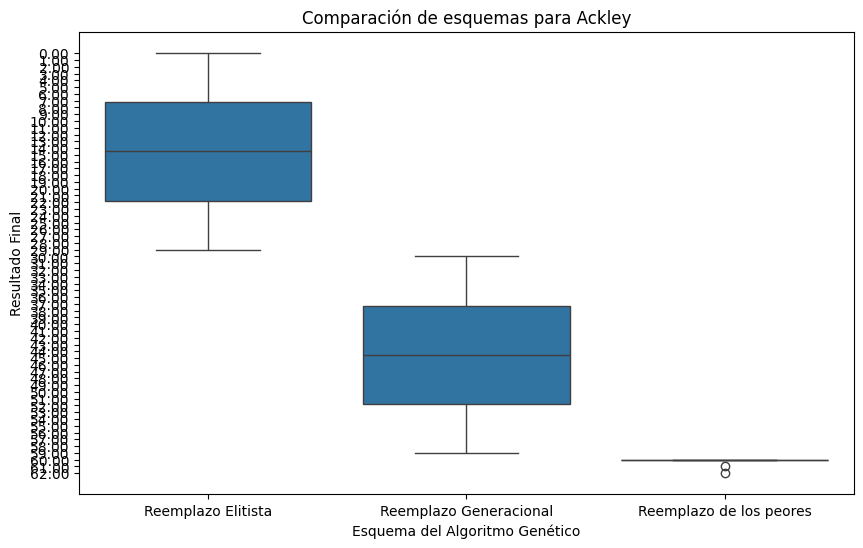

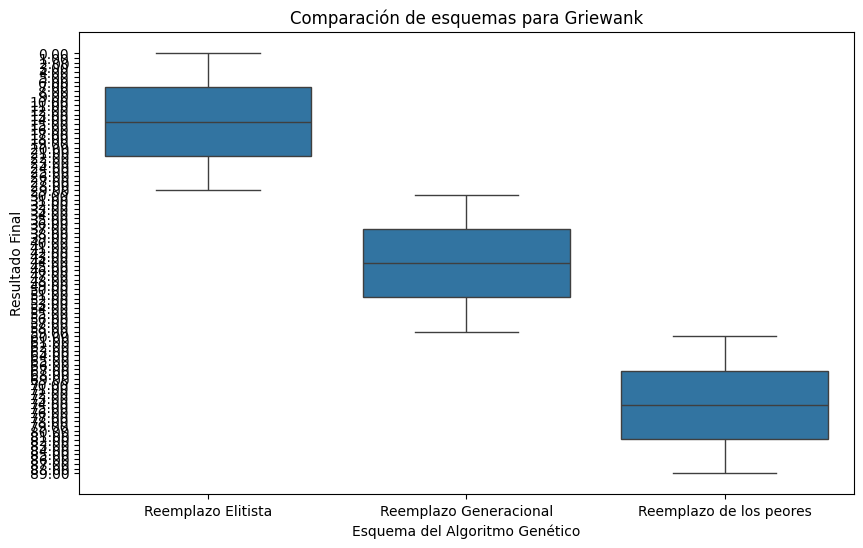

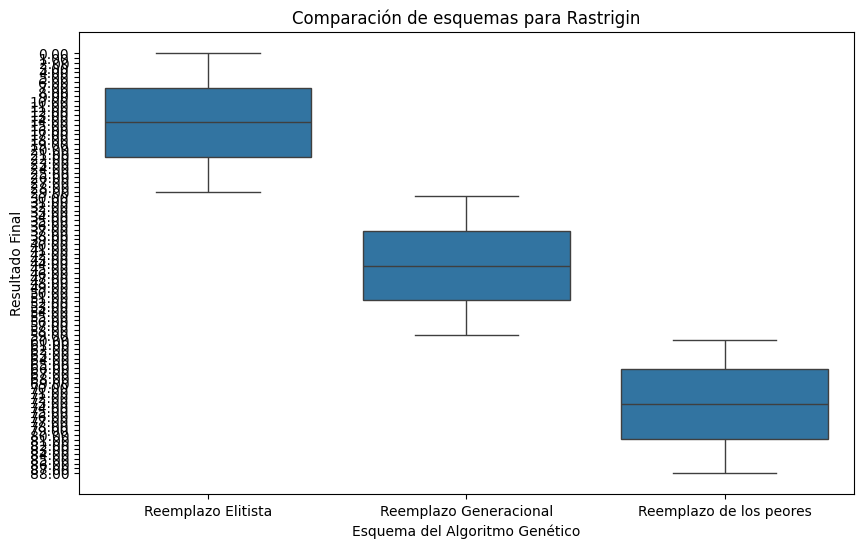

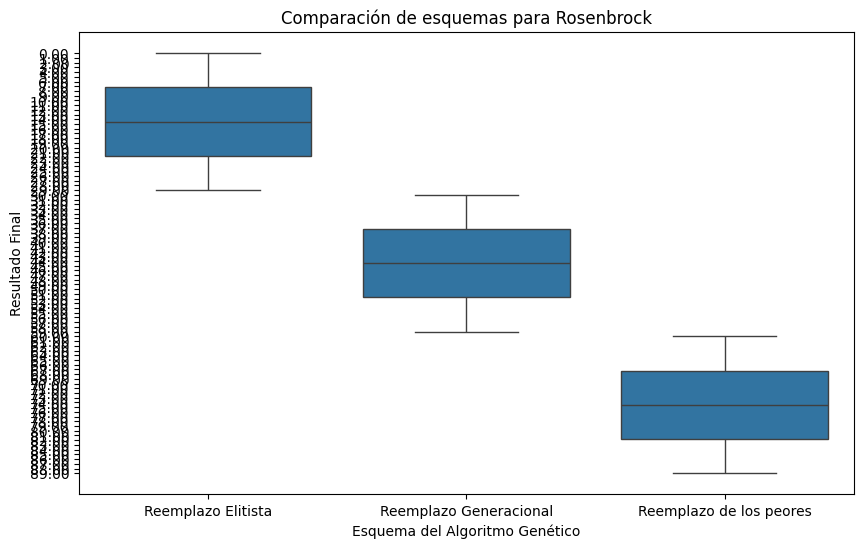

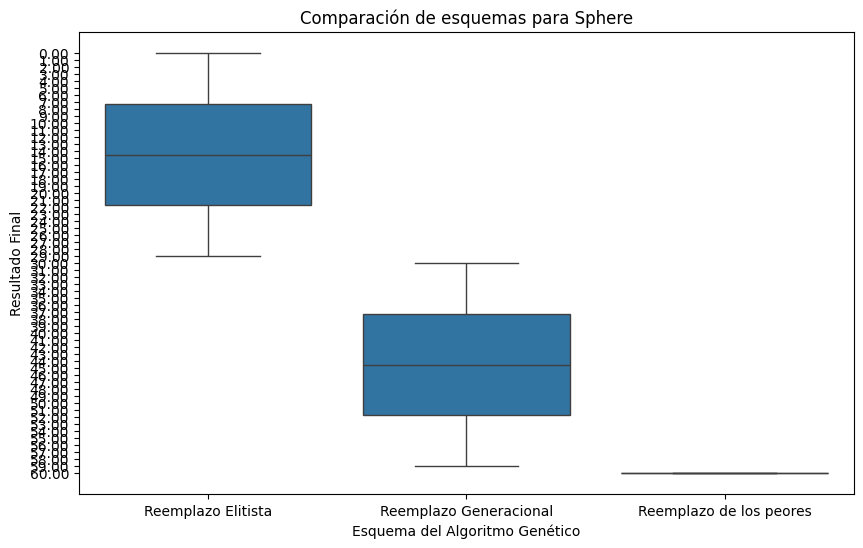

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Ruta principal donde están las carpetas de funciones (ajusta la ruta)
base_path = r"C:\Users\Chinitok666\Documents\GitHub\C-mputo-Evolutivo-primeros-intentos\Tarea 5"

# Nombres de las funciones y esquemas (clave de cada esquema en los nombres de archivo)
funciones = ["Ackley", "Griewank", "Rastrigin", "Rosenbrock", "Sphere"]  # Ajusta según tus funciones
esquemas = {"Reemplazo Elitista": "elitismo", "Reemplazo Generacional": "generacional", 
            "Reemplazo de los peores": "peores"}

# Diccionario para almacenar los datos finales
resultados = {func: {esq: [] for esq in esquemas} for func in funciones}

# Procesar cada función y cada esquema
for funcion in funciones:
    funcion_path = os.path.join(base_path, f"Ejecuciones_{funcion}")
    
    # Leer cada archivo en la carpeta de la función actual
    for filename in os.listdir(funcion_path):
        # Buscar el esquema en el nombre del archivo usando expresiones regulares
        for esq_key, esq_name in esquemas.items():
            if re.search(f"{funcion}_resultados_{esq_name}", filename):
                file_path = os.path.join(funcion_path, filename)
                
                # Leer el archivo CSV sin encabezado
                df = pd.read_csv(file_path, header=None)
                
                # Verificar si el archivo tiene al menos 1001 filas
                if len(df) >= 1001:
                    valor_fila_1001 = df.iloc[1000, 0]  # Valor en la fila 1001 (índice 1000)
                    resultados[funcion][esq_key].append(valor_fila_1001)

    # Imprimir los resultados recopilados para verificar los valores
    print(f"Resultados para la función {funcion}:")
    for esq_key, valores in resultados[funcion].items():
        print(f"  {esq_key}: {valores}")

# Crear los boxplots para cada función
for funcion, esquemas_data in resultados.items():
    # Crear un DataFrame para seaborn
    df_plot = pd.DataFrame({
        "Esquema": [esq for esq in esquemas_data for _ in range(len(esquemas_data[esq]))],
        "Resultado Final": [resultado for esq in esquemas_data for resultado in esquemas_data[esq]]
    })

    # Configurar el boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_plot, x="Esquema", y="Resultado Final")
    plt.title(f"Comparación de esquemas para {funcion}")
    plt.xlabel("Esquema del Algoritmo Genético")
    plt.ylabel("Resultado Final")

    # Ajustar el formato del eje Y para evitar sobrecarga visual
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))

    plt.show()



Diccionario de resultados (resumen):
Función: Ackley
  Reemplazo Elitista: 30 valores, Ejemplo de valores: ['2.794166', '5.014215', '3.395815', '4.634447', '4.001415']
  Reemplazo Generacional: 30 valores, Ejemplo de valores: ['19.881458', '19.457625', '20.239887', '20.080941', '19.840521']
  Reemplazo de los peores: 30 valores, Ejemplo de valores: ['0.000114', '0.000114', '0.000114', '1.646246', '0.000114']
Función: Griewank
  Reemplazo Elitista: 30 valores, Ejemplo de valores: ['1.290068', '1.170033', '0.810187', '1.210124', '1.254802']
  Reemplazo Generacional: 30 valores, Ejemplo de valores: ['87.489127', '155.032160', '160.424358', '169.309267', '141.583558']
  Reemplazo de los peores: 30 valores, Ejemplo de valores: ['0.040418', '0.054301', '0.187642', '0.101321', '0.091262']
Función: Rastrigin
  Reemplazo Elitista: 30 valores, Ejemplo de valores: ['17.598453', '10.167278', '22.926829', '33.129213', '11.407305']
  Reemplazo Generacional: 30 valores, Ejemplo de valores: ['87.2659

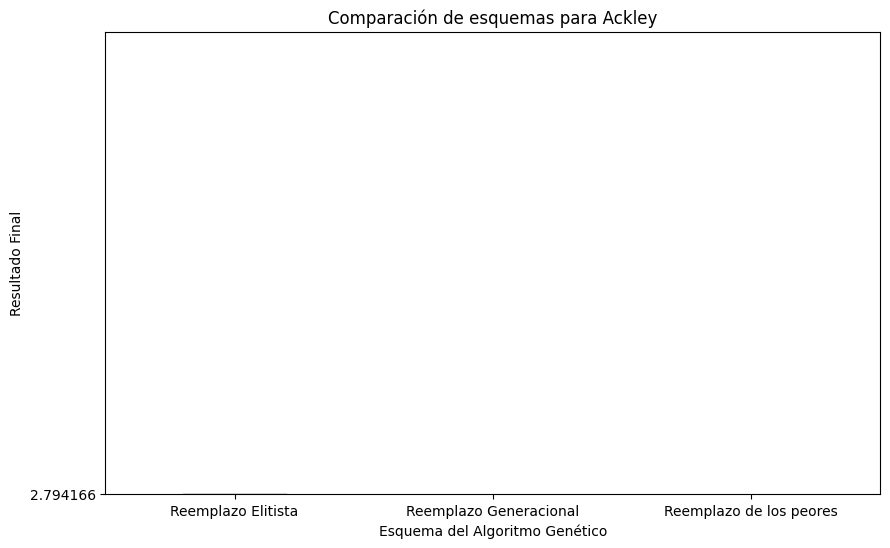


DataFrame para la función Griewank:
              Esquema Resultado Final
0  Reemplazo Elitista        1.290068
1  Reemplazo Elitista        1.170033
2  Reemplazo Elitista        0.810187
3  Reemplazo Elitista        1.210124
4  Reemplazo Elitista        1.254802


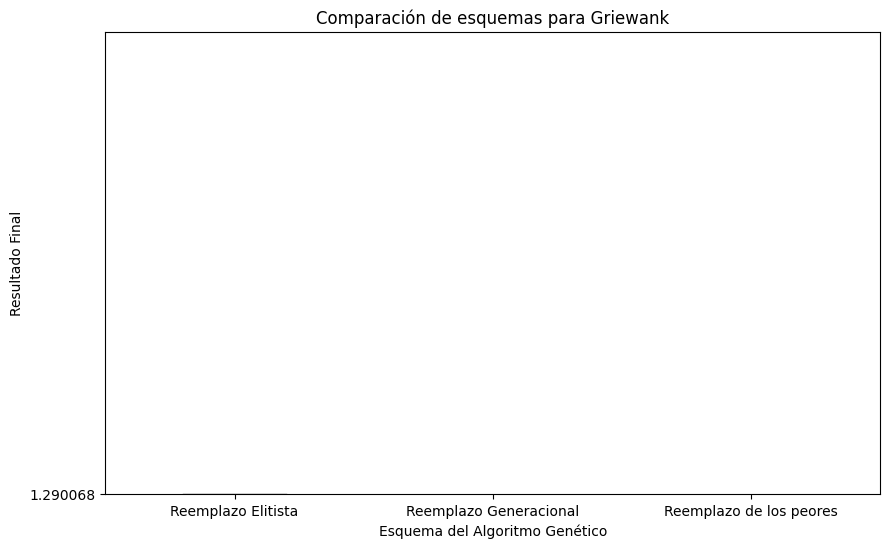


DataFrame para la función Rastrigin:
              Esquema Resultado Final
0  Reemplazo Elitista       17.598453
1  Reemplazo Elitista       10.167278
2  Reemplazo Elitista       22.926829
3  Reemplazo Elitista       33.129213
4  Reemplazo Elitista       11.407305


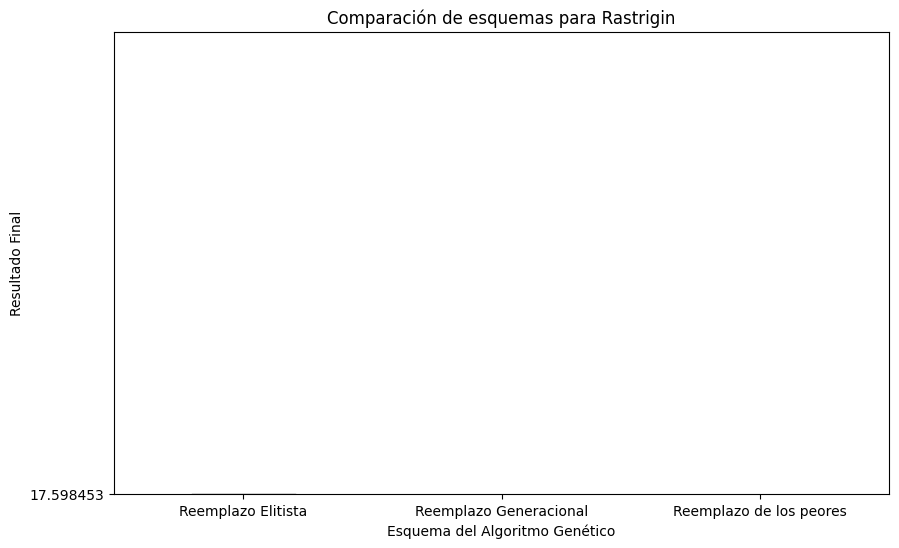


DataFrame para la función Rosenbrock:
              Esquema Resultado Final
0  Reemplazo Elitista       10.163176
1  Reemplazo Elitista        9.869317
2  Reemplazo Elitista        9.097507
3  Reemplazo Elitista       12.489069
4  Reemplazo Elitista        9.631534


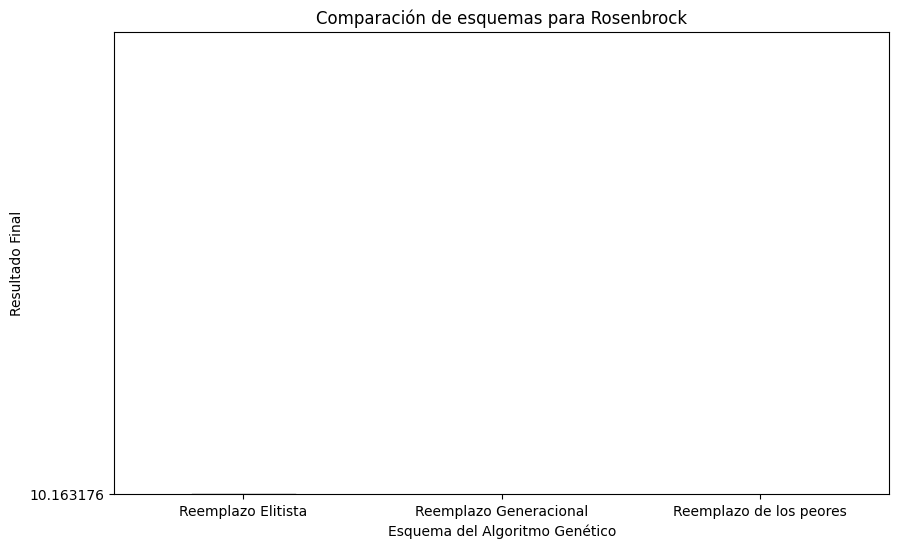


DataFrame para la función Sphere:
              Esquema Resultado Final
0  Reemplazo Elitista        0.049847
1  Reemplazo Elitista        0.233140
2  Reemplazo Elitista        0.049974
3  Reemplazo Elitista        0.077154
4  Reemplazo Elitista        0.066951


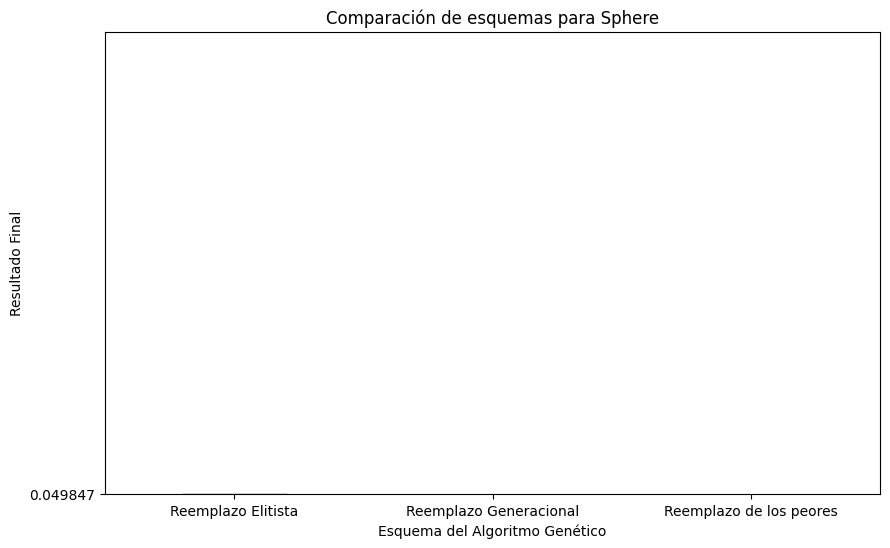

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Ruta principal donde están las carpetas de funciones (ajusta la ruta)
base_path = r"C:\Users\Chinitok666\Documents\GitHub\C-mputo-Evolutivo-primeros-intentos\Tarea 5"

# Nombres de las funciones y esquemas (clave de cada esquema en los nombres de archivo)
funciones = ["Ackley", "Griewank", "Rastrigin", "Rosenbrock", "Sphere"]  # Ajusta según tus funciones
esquemas = {"Reemplazo Elitista": "elitismo", "Reemplazo Generacional": "generacional", 
            "Reemplazo de los peores": "peores"}

# Diccionario para almacenar los datos finales
resultados = {func: {esq: [] for esq in esquemas} for func in funciones}

# Procesar cada función y cada esquema
for funcion in funciones:
    funcion_path = os.path.join(base_path, f"Ejecuciones_{funcion}")
    
    # Leer cada archivo en la carpeta de la función actual
    for filename in os.listdir(funcion_path):
        # Buscar el esquema en el nombre del archivo usando expresiones regulares
        for esq_key, esq_name in esquemas.items():
            if re.search(f"{funcion}_resultados_{esq_name}", filename):
                file_path = os.path.join(funcion_path, filename)
                
                # Leer el archivo CSV sin encabezado
                df = pd.read_csv(file_path, header=None)
                
                # Verificar si el archivo tiene al menos 1001 filas
                if len(df) >= 1001:
                    valor_fila_1001 = df.iloc[1000, 0]  # Valor en la fila 1001 (índice 1000)
                    resultados[funcion][esq_key].append(valor_fila_1001)
                else:
                    print(f"El archivo {filename} tiene menos de 1001 filas y no se procesará.")

# Verificar el diccionario de resultados antes de graficar
print("\nDiccionario de resultados (resumen):")
for func, esquemas_data in resultados.items():
    print(f"Función: {func}")
    for esquema, valores in esquemas_data.items():
        print(f"  {esquema}: {len(valores)} valores, Ejemplo de valores: {valores[:5]}")

# Crear los boxplots para cada función
for funcion, esquemas_data in resultados.items():
    # Crear un DataFrame para seaborn
    df_plot = pd.DataFrame({
        "Esquema": [esq for esq in esquemas_data for _ in range(len(esquemas_data[esq]))],
        "Resultado Final": [resultado for esq in esquemas_data for resultado in esquemas_data[esq]]
    })

    # Verificar el DataFrame antes de graficar
    print(f"\nDataFrame para la función {funcion}:")
    print(df_plot.head())

    # Configurar el boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_plot, x="Esquema", y="Resultado Final")
    plt.title(f"Comparación de esquemas para {funcion}")
    plt.xlabel("Esquema del Algoritmo Genético")
    plt.ylabel("Resultado Final")
    
    # Configurar el límite inferior del eje Y en 0
    plt.ylim(0, None)

    # Mostrar el gráfico
    plt.show()
